# Sample marked 5 10 ps avg 

In [1]:
#import libraries

import numpy as np
from skimage import io
import mplcursors
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 16
plt.rcParams['figure.figsize'] = (10, 5)

In [2]:
def TA_2D_contour(data):
    
    df = pd.read_csv(data)    #Import data
    df_time = pd.Series(df.columns) #take out the column name which contains time info
    df_lambda = pd.Series(df.iloc[:,0])  #take out wavelength info from the first row
    df3 = df.set_index(df.iloc[:, 0])  #Set the first column as index
    df3 = df3.iloc[: , 1:]                  #drop the first column
    df3.index.names = ['Wavelength']   #rename index column name to wavelength
    df4 = df3.fillna(0)  #fill nan values with 0
    
    # converting string column values to float
    df4_columns = pd.Series(df4.columns)
    df4_columns_num = df4_columns.apply(pd.to_numeric, errors='coerce')
    df4.columns = df4_columns_num
    
    return df4

In [3]:
#function for plotting data

def Plotting_2D_contour(df):
    #plotting the data

    x1 = df.columns
    y1 = df.index
    z1 = df
    X1,Y1 = np.meshgrid(x1,y1)
    Z1 = z1
    img = plt.contourf(X1,Y1,Z1,50, cmap='jet', vmin=-8, vmax=8 )
    plt.colorbar(img)
    
    return 

In [4]:
data = 'TA_matrix_31Mar_10ps_10fs.txt'
df4 = TA_2D_contour(data)
df4_test = df4.iloc[1150:1810]

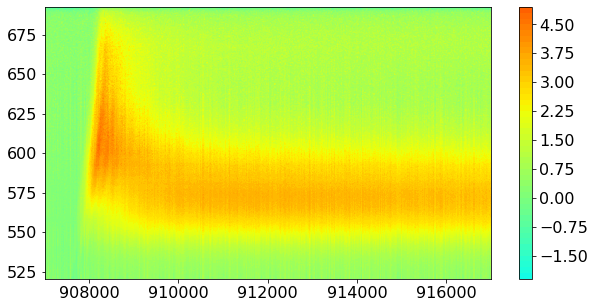

In [5]:
Plotting_2D_contour(df4_test)